In [87]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm
import pyregion
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import match_coordinates_sky

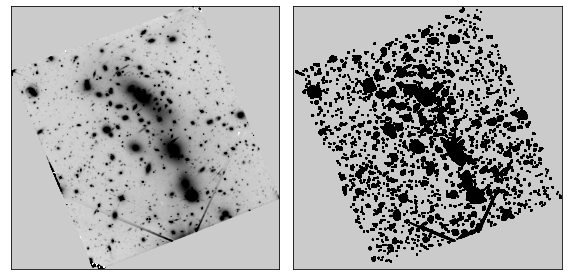

In [85]:
plt.figure(figsize=(8,4))
ax1=plt.subplot(121)
data=fits.open('f160w.fits')[0].data
hdr=fits.open('f160w.fits')[0].header
exptime=hdr['exptime']
norm=simple_norm(data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
plt.imshow(data/exptime,cmap='gray_r',norm=norm,origin='lower',aspect='auto')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2=plt.subplot(122)
seg_data=fits.open('t.sex.outseg.fits')[0].data
plt.imshow(seg_data,cmap='gray_r',norm=norm,origin='lower',aspect='auto')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
plt.subplots_adjust(wspace=0.0)
plt.tight_layout()
plt.savefig('f160w+segmap.jpg',dpi=150)

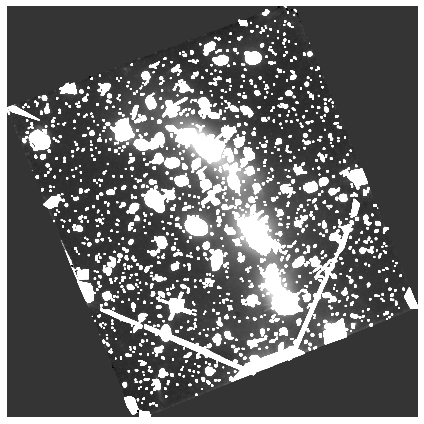

In [73]:
hdu=fits.open('f160w.fits')[0]
data=hdu.data
header=hdu.header
r = pyregion.open('edge+spike.reg')
data[r.get_mask(hdu=hdu)]=1e6
seg_data=fits.open('t.sex.outseg.fits')[0].data
data[np.where(seg_data!=0)]=1e6
fits.writeto('f160w_masked.fits',data,header=header,overwrite=True)
plt.figure(figsize=(6,6))
plt.imshow(data/exptime,cmap='gray',norm=norm,origin='lower',aspect='auto')
plt.axis('off')
plt.tight_layout()
plt.savefig('f160w_masked.jpg',dpi=150)

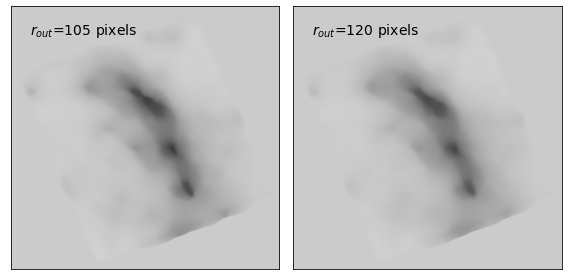

In [83]:
plt.figure(figsize=(8,4))
ax1=plt.subplot(121)
data=fits.open('icl105.fits')[0].data
hdr=fits.open('icl105.fits')[0].header
exptime=hdr['exptime']
norm=simple_norm(data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
plt.imshow(data/exptime,cmap='gray_r',norm=norm,origin='lower',aspect='auto')
plt.text(200,2600,'$r_{out}$=105 pixels',fontsize=14)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2=plt.subplot(122)
data=fits.open('icl120.fits')[0].data
plt.imshow(data/exptime,cmap='gray_r',norm=norm,origin='lower',aspect='auto')
plt.text(200,2600,'$r_{out}$=120 pixels',fontsize=14)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
plt.subplots_adjust(wspace=0.0)
plt.tight_layout()
plt.savefig('icl105_120.jpg',dpi=150)

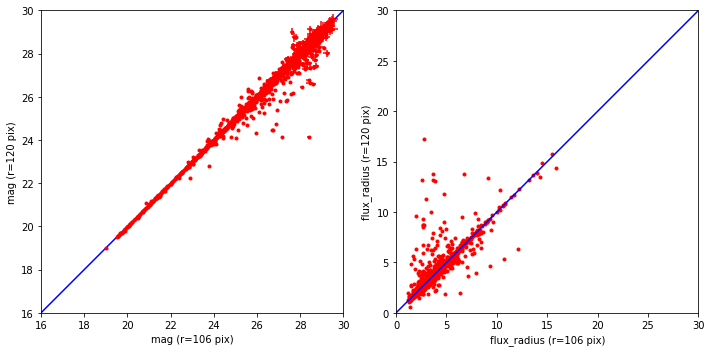

In [98]:
data1=np.loadtxt('t.sex.outcat')
magerr1_cut=data1[:,18]<20.0
ra1=data1[:,12][magerr1_cut]
dec1=data1[:,13][magerr1_cut]
mag1=data1[:,17][magerr1_cut]
magerr1=data1[:,18][magerr1_cut]
flux_radius1=data1[:,19][magerr1_cut]

np.savetxt('mag_magerr',np.transpose((mag1,magerr1)),fmt='%7.4f %7.4f',delimiter='')

data2=np.loadtxt('t.sex.outcat2')
magerr2_cut=data2[:,18]<20.0
ra2=data2[:,12][magerr2_cut]
dec2=data2[:,13][magerr2_cut]
mag2=data2[:,17][magerr2_cut]
magerr2=data2[:,18][magerr2_cut]
flux_radius2=data2[:,19][magerr2_cut]
source_coord=SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
catalog_coord=SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)
idx, d2d, d3d = match_coordinates_sky(source_coord,catalog_coord)

max_sep = 0.3 * u.arcsec
sep_constraint = d2d < max_sep

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5) )
ax1=plt.subplot(121)
plt.errorbar(mag1[sep_constraint],mag2[idx[sep_constraint]],xerr=magerr1[sep_constraint],yerr=magerr2[idx[sep_constraint]],fmt='r.')
plt.plot([16,30],[16,30],'b-')
plt.xlim(16,30)
plt.ylim(16,30)
plt.xlabel('mag (r=106 pix)')
plt.ylabel('mag (r=120 pix)')
plt.gca().set_aspect('equal')

ax2=plt.subplot(122)
plt.plot(flux_radius1[sep_constraint],flux_radius2[idx[sep_constraint]],'r.')
plt.plot([0,30],[0,30],'b-')
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel('flux_radius (r=106 pix)')
plt.ylabel('flux_radius (r=120 pix)')
plt.gca().set_aspect('equal')
plt.subplots_adjust(wspace=0.0)
plt.tight_layout()
plt.savefig('match.jpg',dpi=200)


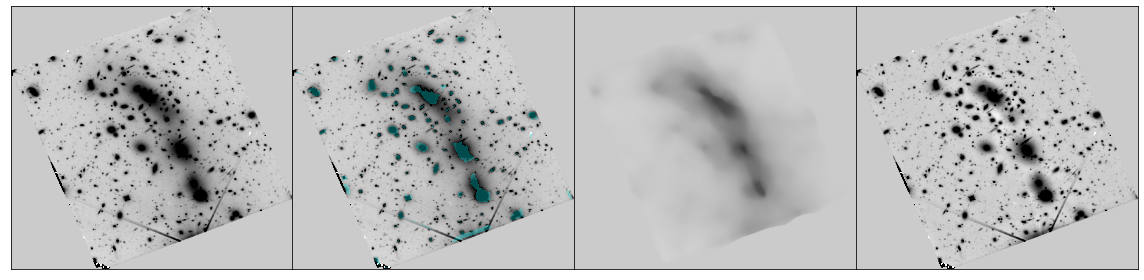

In [105]:
plt.figure(figsize =(4*4,1*4))
ax1=plt.subplot(141)
data=fits.open('f160w.fits')[0].data
hdr=fits.open('f160w.fits')[0].header
exptime=hdr['exptime']
norm=simple_norm(data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax1.imshow(data/exptime,cmap='gray_r',norm=norm,origin='lower',aspect='auto')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2=plt.subplot(142)
hdu=fits.open('t.sex.outseg.fits')[0]
seg=hdu.data
seg[np.where(seg!=0)]=1
r = pyregion.open('edge+spike.reg')
seg[r.get_mask(hdu=hdu)]=1
norm=simple_norm(data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax2.imshow(data/exptime,cmap='gray_r',norm=norm,origin='lower',aspect='auto')
masked=np.ma.masked_where(seg==0,seg)
ax2.imshow(masked,alpha=0.3,cmap='cool',origin='lower',aspect='auto')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

ax3=plt.subplot(143)
icl=fits.open('icl106.fits')[0].data
norm=simple_norm(icl,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax3.imshow(icl/exptime,cmap='gray_r',norm=norm,origin='lower',aspect='auto')
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax4=plt.subplot(144)
residual=fits.open('f160w_icl106_out.fits')[0].data
norm=simple_norm(residual,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax4.imshow(residual/exptime,cmap='gray_r',norm=norm,origin='lower',aspect='auto')
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.0)
plt.savefig('icl.jpg',dpi=150)
